# Assignment #5
In this assignment you'll write python/numpy code to scale and do principal component analysis on data.  You'll be doing the same thing the author did in Chapter 10 for Scaling and Dimensionality Reduction, but rewriting the functions in numpy.  You can read that part of the chapter to review the process.

I've left significant chunks of code to make it easier, but you'll need to fill in the missing pieces.

I've also left my outputs displayed, so yours should match.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in data 
npz_file = np.load('pca_data.npz')
pca_data = npz_file['pca_data']

In [3]:
# center the data around (0,0) by subtracting the mean from each feature
pca_data -= np.mean(pca_data,axis = 0)

# NOTE: from here on we'll use the "de-meaned" data

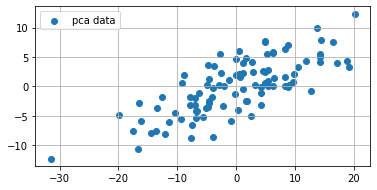

In [4]:
# plot the data
fig, ax = plt.subplots()
ax.scatter(pca_data[:,0],pca_data[:,1],label='pca data')
ax.grid()
ax.set_aspect('equal', 'box')
ax.legend()

# Part I - Scaling Data

## I-a) Normalization - change ranges of each feature to be between 0 and 1

In [5]:
# normalize pca_data
......YOUR CODE HERE ..............
pca_data_normd = ......YOUR CODE HERE ..............
print(pca_data_normd[:5])

[[0.62254152 0.56584317]
 [0.65745741 0.29078798]
 [0.71348178 0.61123889]
 [0.5652024  0.3594036 ]
 [0.6308592  0.65615071]]


## I-b) Standardization - find mean, sigma - subtract mean, divide by sigma

In [6]:
# standardize pca_data
......YOUR CODE HERE ..............
pca_data_stdzd = ......YOUR CODE HERE ..............
print(pca_data_stdzd[:5])

[[ 0.07030252  0.35739973]
 [ 0.26076411 -1.07802839]
 [ 0.56636972  0.59430599]
 [-0.24247487 -0.71994466]
 [ 0.11567437  0.8286869 ]]


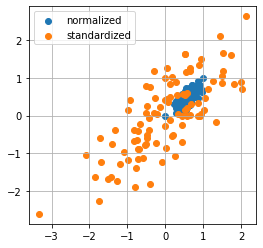

In [7]:
# plot both the normalized and standardized data on a single plot
......YOUR CODE HERE ..............

### NOTE: from here on out we'll do our PCA on the normalized data

# Part II) - Principal Component Analysis - see book for more info

##  Part II-a) sklearn implementation

In [8]:
# use the sklearn version to do PCA on the normalized data
from sklearn.decomposition import PCA
X = pca_data_normd # same data, just call it X 
......YOUR CODE HERE ..............
print(pca.components_)
p_hat_0 = pca.components_[0]
p_hat_1 = pca.components_[1]

[[-0.68609228 -0.72751452]
 [ 0.72751452 -0.68609228]]


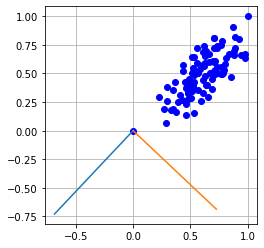

In [9]:
# plot the data and the two principal component axes vectors, starting at the origin
fig, ax = plt.subplots()
ax.plot(X[:,0],X[:,1],'bo')
ax.grid()
ax.set_aspect('equal', 'box')
ax.plot((0,p_hat_0[0]),(0,p_hat_0[1]))
ax.plot((0,p_hat_1[0]),(0,p_hat_1[1]))

## Part II-b) implementation from scratch using numpy
NOTE: this section follows the process of the author, but uses numpy arrays instead of "from scratch" data structures

In [10]:
# function that will normalize an input numpy vector, returning the normalized vector
def direction(w):
    return ......YOUR CODE HERE ..............
      
# test function
w = X[0]
print(w,direction(w))

[0.62254152 0.56584317] [0.7400014  0.67260533]


In [11]:
# demonstrate np version of dot product on first two rows of pca_data
print(np.dot(X[0,:],X[1,:]))

0.5738349254698356


In [12]:
# function that will return the sum of the directional variances of an input array of vectors (e.g. pca_data)
# in the direction of an input vector 'w'

def directional_variance(data, w):
    w_hat = direction(w)
    return ......YOUR CODE HERE ..............

w = np.array((3,2))
tmp = directional_variance(X, w)
print(tmp)

66.5637200433253


In [13]:
# function that will calculate the gradient of the directional variance with respect to w
def directional_variance_gradient(data, w):
    """
    The gradient of directional variance with respect to w
    """
    w_hat = w/np.linalg.norm(w)
    return ......YOUR CODE HERE ..............

print(directional_variance_gradient(X, w))
    

[102.9837727   85.52324665]


In [14]:
# function that will perform gradient descent optimization to find the first principal component of the input data
# NOTE: here we are MAXIMIZING the variance (so not minimizing like we often see w/ optimization)
def first_principal_component(data,N = 100, step_size = 0.1):
    guess = np.random.random((data.shape[1]))
    for n in range(N):
        ......YOUR CODE HERE ..............
    return guess
        
p = first_principal_component(X)  
print(p)
p_hat = direction(p)
print(p_hat)

[1035.3290204   862.16162334]
[0.76844483 0.63991604]


In [15]:
# function that will return a vector in the direction of 'w' with 
# magnitude equal to the length of the projection of 'v' onto 'w'
# NOTE: normalize 'w' inside the function

def project(v,w):
    ......YOUR CODE HERE ..............


print(project(X[0],p))

[0.64586323 0.53783723]


In [16]:
# function that projects 'v' onto 'w' and subtracts the result from 'v'

def remove_projection_from_vector(v, w):
    ......YOUR CODE HERE ..............

print(remove_projection_from_vector(X[0],p))

[-0.02332171  0.02800594]


In [17]:
# function that removes the projections onto 'w' from an input array of vectors (like pca_data)
def remove_projection(data,w):
    output_arr = np.zeros(data.shape)
    for n in range(len(data)):
        output_arr[n] = remove_projection_from_vector(data[n], w)
    return output_arr
        
p_r = remove_projection(X,p)
print(p_r[:5])

[[-0.02332171  0.02800594]
 [ 0.12623177 -0.15158574]
 [-0.00840526  0.01009347]
 [ 0.05471297 -0.06570221]
 [-0.06432353  0.07724308]]


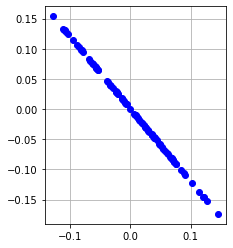

In [18]:
# plot the data with the projection removed
fig, ax = plt.subplots()
ax.plot(p_r[:,0],p_r[:,1],'bo')
ax.grid()
ax.set_aspect('equal', 'box')

In [19]:
def pca(data, num_components):
    components = np.zeros((num_components,data.shape[1]))
    for n in range(num_components):      
        ......YOUR CODE HERE ..............
        
    return components

p_components = pca(X,2)
print(p_components)

[[1034.25483698  861.69211805]
 [  -8.90764122   12.82797512]]


In [20]:
# normalize the components
p_hat_0 = direction(p_components[0])
p_hat_1 = direction(p_components[1])
print(p_hat_0,p_hat_1)

[0.76828956 0.64010245] [-0.57036666  0.82139021]


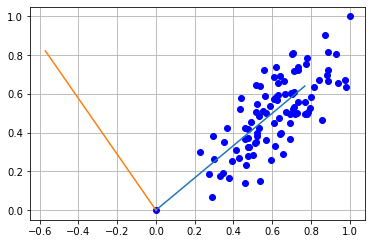

In [21]:
# plot the data and the two principal component axes vectors, starting at the origin
fig, ax = plt.subplots()
ax.plot(X[:,0],X[:,1],'bo')
ax.grid()
ax.set_aspect('equal', 'box')
ax.plot((0,p_hat_0[0]),(0,p_hat_0[1]))
ax.plot((0,p_hat_1[0]),(0,p_hat_1[1]))